In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [86]:
d90_file = '../results/complexity_utf-16_10_10_1234_bibles_90_lcm.csv'
dall_file = '../results/complexity_utf-16_10_10_1234_bibles_lcm.csv'
family_file = pd.read_csv('../dataset/family.csv', index_col=None)

In [77]:
def calculate_sem(group):
    std = group['value'].std()
    n = len(group)
    sem = std / np.sqrt(n)
    return sem

In [78]:
def analyze(file_path):
    df = pd.read_csv(file_path)
    sem_stats = df.groupby('language').apply(calculate_sem).reset_index()
    sem_stats.columns = ['language', 'sem']
    sem_stats = sem_stats.sort_values('sem', ascending=False)
    return sem_stats


Standard Error of the Mean (SEM) para bibles_90_lcm:
                    language       sem
3                  ASHENINKA  0.084628
14                    MATSÉS  0.082742
2                    APURINÃ  0.082362
19                   PARECÍS  0.082238
23                    TERÊNA  0.082055
24                    TUYÚCA  0.081971
25                 WAPISHANA  0.081850
13                   MACUSHI  0.081723
18                   PALIKÚR  0.081641
11                  JAMAMADI  0.081601
17                 NHEENGATU  0.081377
10  GUARANI_WESTERN_BOLIVIAN  0.081202
7   GUARANI_EASTERN_BOLIVIAN  0.081171
1                    APALAÍ  0.081163
26                  YANOMAMI  0.080353
0              ANCIENT_GREEK  0.080257
9           GUARANI_PARAGUAY  0.080222
21               SATERÉ-MAWÉ  0.080195
16                     NADEB  0.080057
15                  MAXAKALI  0.079949
8               GUARANI_MBYA  0.079842
6                    GERMANY  0.079007
12                   KAIGANG  0.078998
5         

/tmp/ipykernel_6203/271940572.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby('language').apply(calculate_sem).reset_index()
/tmp/ipykernel_6203/271940572.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby('language').apply(calculate_sem).reset_index()


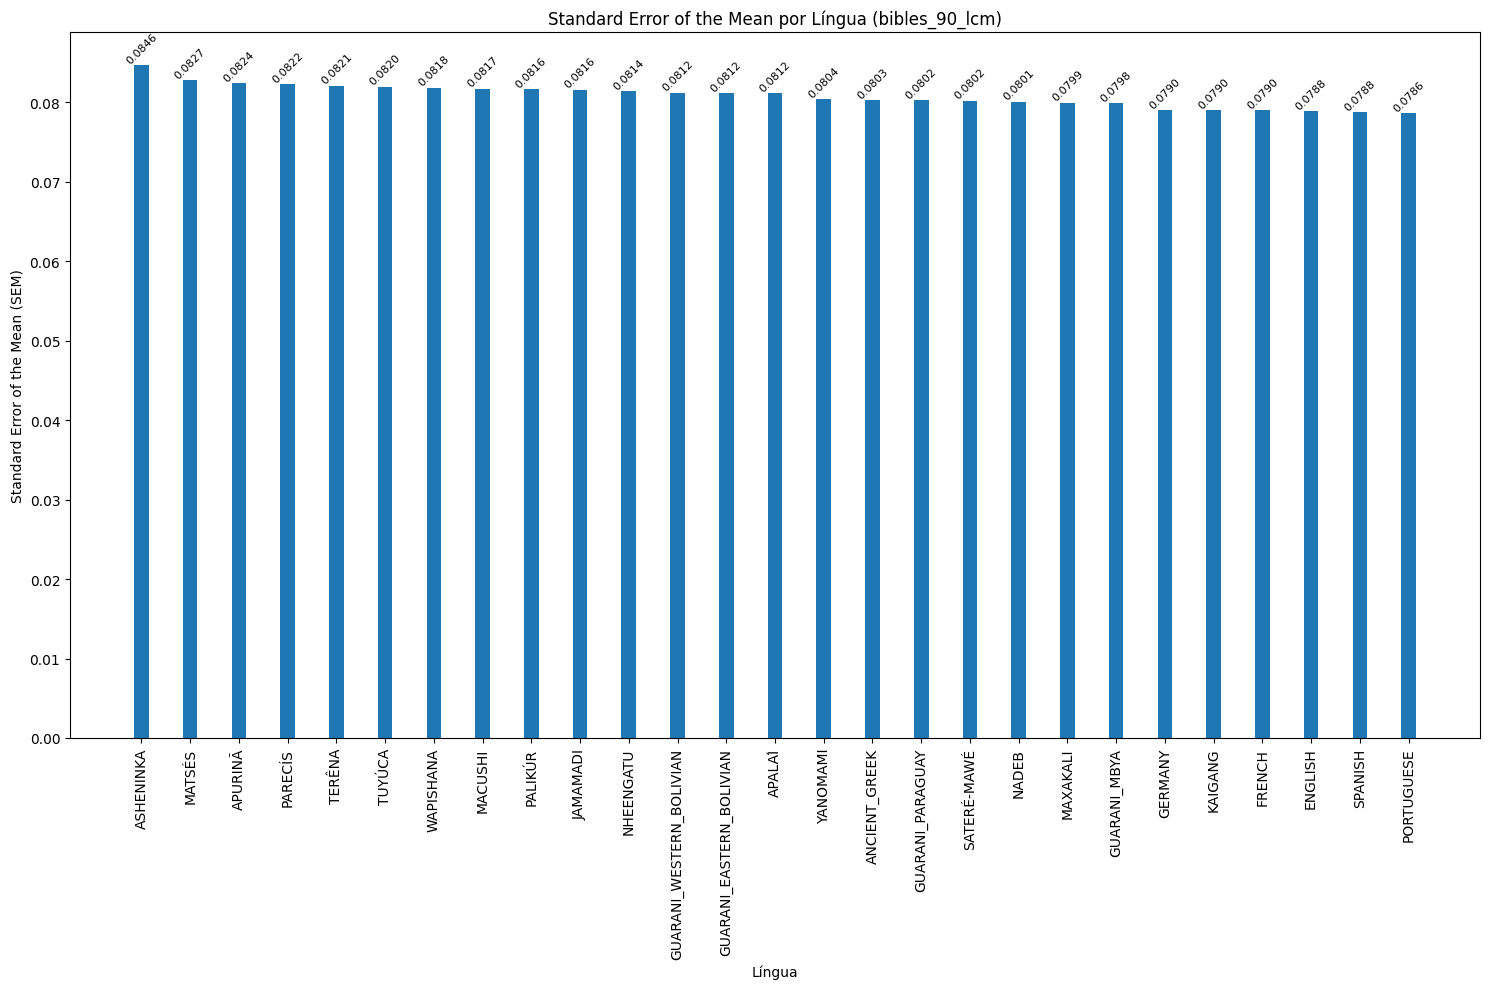


Estatísticas resumidas para bibles_90_lcm:
Número de línguas: 27
Média do SEM: 0.080808
Mediana do SEM: 0.081163
SEM máximo: 0.084628 (ASHENINKA)
SEM mínimo: 0.078626 (PORTUGUESE)

Standard Error of the Mean (SEM) para bibles_lcm:
                    language       sem
35                NAMBIKUÁRA  0.093253
4                  ASHENINKA  0.085382
21                   KADIWÉU  0.083619
8                     CULINA  0.082925
18                HIXKARYÁNA  0.082784
39                   PAUMARÍ  0.082749
31                    MATSÉS  0.082646
38                   PARECÍS  0.082299
3                    APURINÃ  0.082243
51                    TUYÚCA  0.082204
42                 RIKBAKTSA  0.082009
45                   SIRIANO  0.081878
49                    TICUNA  0.081848
53                 WAPISHANA  0.081847
50                    TUCANO  0.081828
29                   MACUSHI  0.081796
48                    TERÊNA  0.081792
47                  TENHARIM  0.081789
37                   PALIKÚ

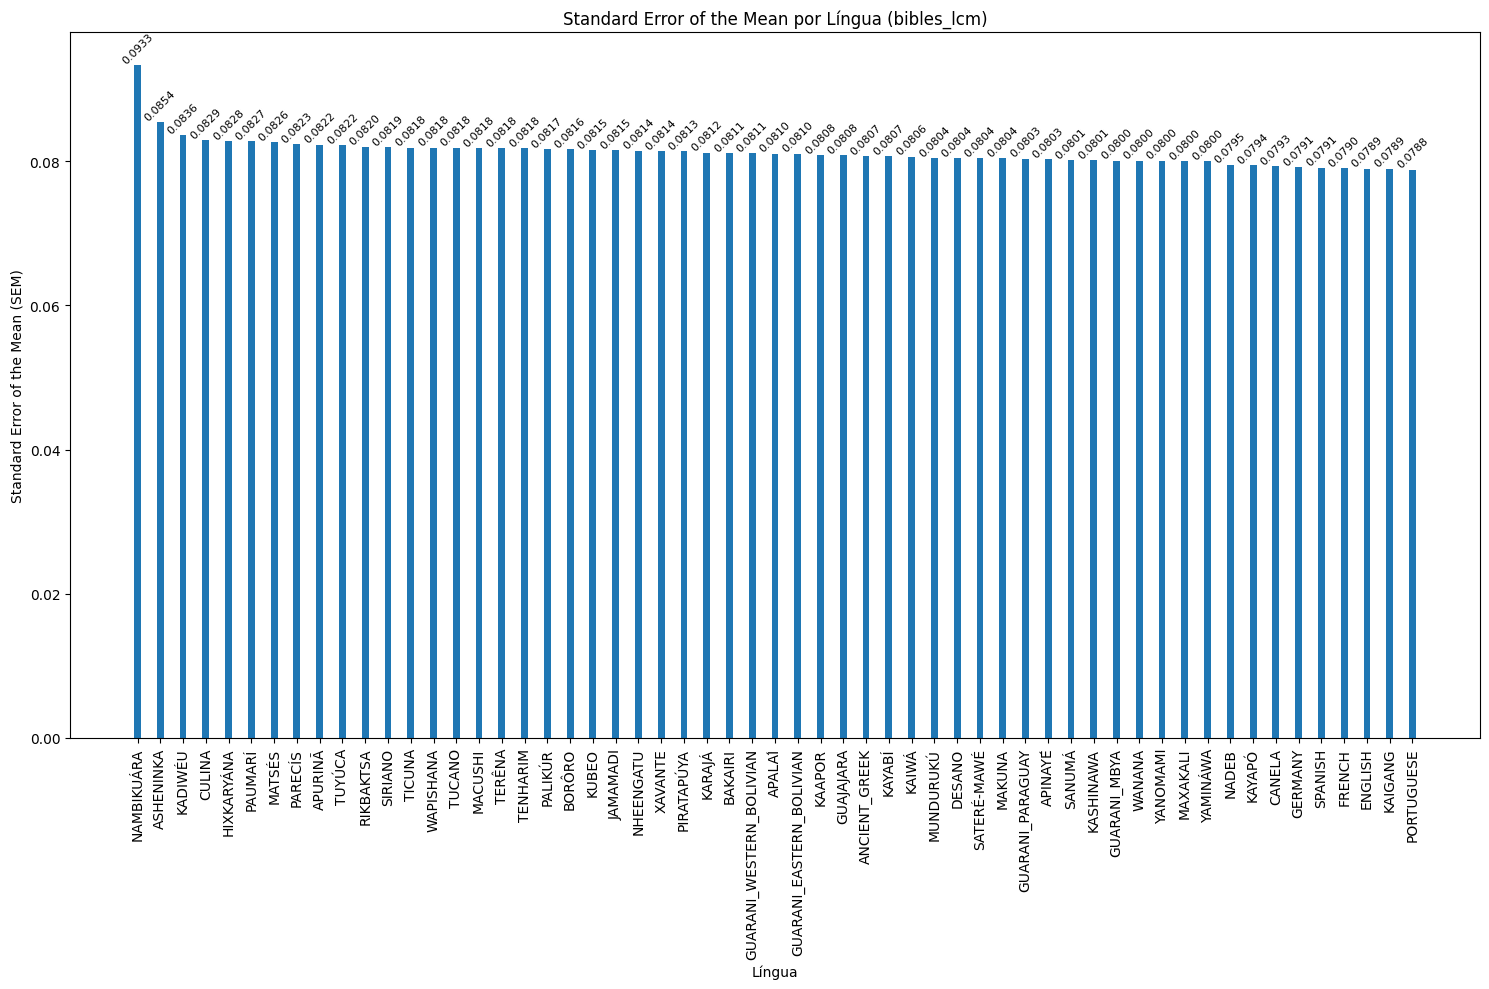


Estatísticas resumidas para bibles_lcm:
Número de línguas: 57
Média do SEM: 0.081211
Mediana do SEM: 0.081039
SEM máximo: 0.093253 (NAMBIKUÁRA)
SEM mínimo: 0.078825 (PORTUGUESE)


In [79]:
def plot(sem_stats, name):
    print(f"\nStandard Error of the Mean (SEM) para {name}:")
    print(sem_stats)

    plt.figure(figsize=(15, 10))
    bars = plt.bar(sem_stats['language'], sem_stats['sem'], width=0.3)
    plt.xticks(rotation=90)
    plt.xlabel('Língua')
    plt.ylabel('Standard Error of the Mean (SEM)')
    plt.title(f'Standard Error of the Mean por Língua ({name})')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.4f}',  # Quatro casas decimais
                 ha='center', va='bottom', rotation=45, fontsize=8)  # Rotação diagonal de 45 graus

    plt.tight_layout()
    plt.show()

    print(f"\nEstatísticas resumidas para {name}:")
    print(f"Número de línguas: {len(sem_stats)}")
    print(f"Média do SEM: {sem_stats['sem'].mean():.6f}")
    print(f"Mediana do SEM: {sem_stats['sem'].median():.6f}")
    print(f"SEM máximo: {sem_stats['sem'].max():.6f} ({sem_stats.iloc[0]['language']})")
    print(f"SEM mínimo: {sem_stats['sem'].min():.6f} ({sem_stats.iloc[-1]['language']})")


sem_stats_90 = analyze(d90_file)
sem_stats_all = analyze(dall_file)

plot(sem_stats_90, "bibles_90_lcm")
plot(sem_stats_all, "bibles_lcm")   


In [80]:
def compute(dfi, alg):
    df = dfi.copy()
    ag = df.algorithm == alg
    dw = df.metric == 'del-words'
    dc = df.metric == 'del-chars'
    
    x = df[dw & ag].groupby(['language', 'algorithm']).value.transform('mean').to_numpy()
    y = df[dc & ag].groupby(['language', 'algorithm']).value.transform('mean').to_numpy()

    df.loc[dw & ag, 'del-words'] = x
    df.loc[dw & ag, 'del-chars'] = y
    df = df.dropna().drop_duplicates('language').reset_index().drop(columns=['metric', 'index', 'run_id'])

    return df

/tmp/ipykernel_6203/4088477424.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby('language').apply(calculate_sem).reset_index()
/tmp/ipykernel_6203/4088477424.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby('language').apply(calculate_sem).reset_index()
/tmp/ipykernel_6203/3048557083.py:51: UserWarning: You passed a edgecolor/edgecolors ('black') for an 

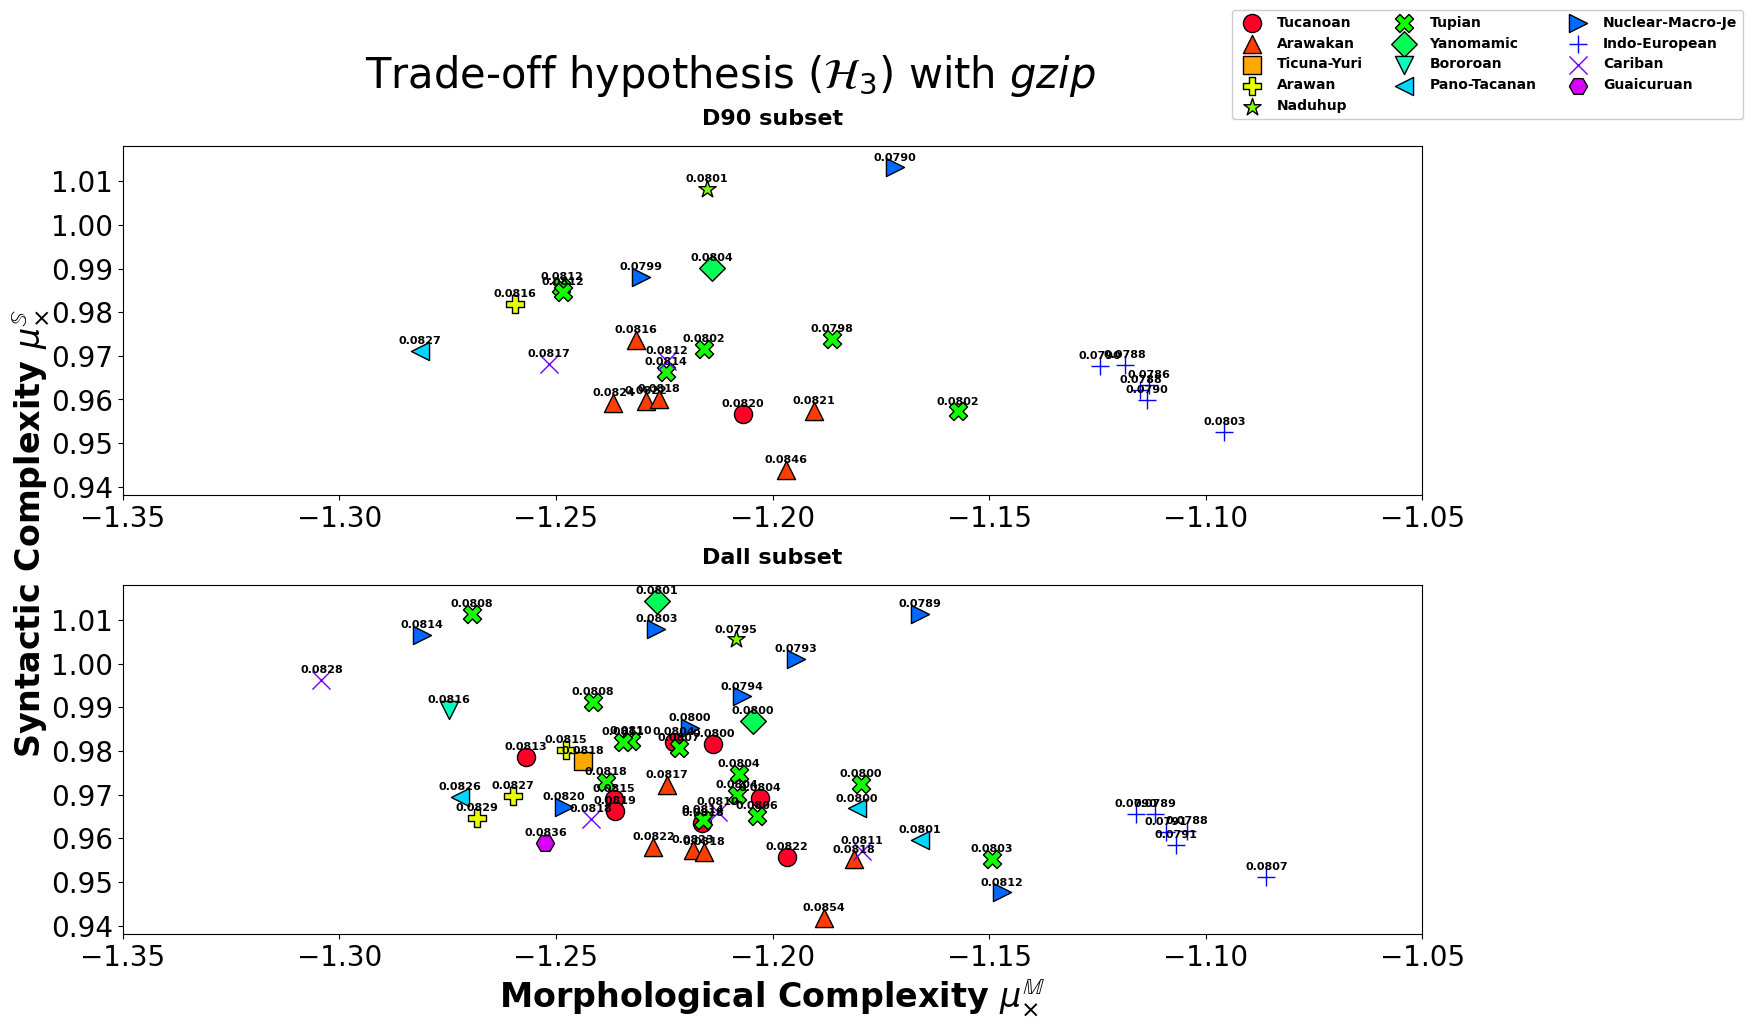

In [94]:
sem_stats_90, df90 = analyze(d90_file)
sem_stats_all, dfall = analyze(dall_file)
family = pd.read_csv(family_file, index_col=None)

def plot(df90, dfall, sem_stats_90, sem_stats_all, algo, family, wals=None):
    def process_df(df, algo, wals):
        wals = wals or set(df.wals)
        df = compute(df[df.wals.isin(wals)], algo)
        df = df.merge(family[['wals', 'family_glottocode']], on='wals', how='left')
        return df

    def create_color_marker_dicts(df1, df2, families):
        unique_families = list(set(families.unique()))
        colors = plt.cm.gist_rainbow(np.linspace(0.0, 1, len(unique_families)))
        markers = ['o', '^', 's', 'P', '*', 'X', 'D', 'v', '<', '>', '+', 'x', 'H', '1', '2', '3', '4', '8', '|', '_']
        family_to_color = {f: colors[i] for i, f in enumerate(unique_families)}
        family_to_marker = {f: markers[i] for i, f in enumerate(unique_families)}
        return unique_families, (colors, family_to_color), (markers, family_to_marker)

    def set_color_marker(df, family_to_color, family_to_marker): 
        df['color'] = df['family_glottocode'].map(family_to_color)
        df['marker'] = df['family_glottocode'].map(family_to_marker)
        return df

    df90 = process_df(df90, algo, wals)
    dfall = process_df(dfall, algo, wals)

    # Merge SEM data
    df90 = df90.merge(sem_stats_90, on='language', how='left')
    dfall = dfall.merge(sem_stats_all, on='language', how='left')

    unique_families, (colors, f2c), (markers, f2m) = create_color_marker_dicts(df90, dfall, dfall['family_glottocode'])

    df90 = set_color_marker(df90, f2c, f2m)
    dfall = set_color_marker(dfall, f2c, f2m)
    
    fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=False, sharey=True)
    fig.suptitle(r"Trade-off hypothesis ($\mathcal{H}_3$) with $\it{%s}$" % (algo.lower(),), fontsize=30)
    fig.supylabel(r'Syntactic Complexity $\mu^{\mathbb{S}}_{\times}$', weight='bold', fontsize=24)
    titles = ['D90 subset', 'Dall subset']

    for di, df in enumerate([df90, dfall]):
        x = df['del-chars'].to_numpy()
        y = df['del-words'].to_numpy()
        sem = df['sem'].to_numpy()
        
        ax[di].set_xlim((-1.35, -1.05))
        for i, f in enumerate(unique_families):
            df_family = df[df['family_glottocode'] == f]
            if len(df_family):
                ax[di].scatter(
                    df_family['del-chars'],
                    df_family['del-words'],
                    c=[colors[i]],
                    marker=markers[i],
                    edgecolor='black',
                    linewidth=1,
                    label=f if di == 1 else "",
                    s=170,
                )
        
        for xi, yi, sem_val in zip(x, y, sem):
            ax[di].annotate(
                f'{sem_val:.4f}',
                xy=(xi, yi),
                xytext=(0, 5),  # Offset para evitar sobreposição
                textcoords='offset points',
                fontsize=8,
                weight='bold',
                ha='center'
            )
        
        if di == 1: ax[di].set_xlabel(r'Morphological Complexity $\mu^{\mathbb{M}}_{\times}$', weight='bold', fontsize=24)
        ax[di].set_title(titles[di], fontsize=16, weight='bold', pad=15)
        
        ax[di].set_xticklabels(ax[di].get_xticklabels(), fontsize=20)
        ax[di].set_yticklabels(ax[di].get_yticklabels(), fontsize=20)

    legend = fig.legend(fontsize=12, bbox_to_anchor=(0.4, 0.3, 0.78, 0.730), ncol=3, prop={'weight' : 'bold'})
    legend.get_frame().set_alpha(None)
    legend.get_title().set_fontsize('x-large')
    fig.tight_layout()
    fig.savefig("../images/h3_with_sem.pdf")

# Chamada da função plot
plot(df90, dfall, sem_stats_90, sem_stats_all, 'gzip', family=family)

/tmp/ipykernel_6203/4088477424.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby('language').apply(calculate_sem).reset_index()
/tmp/ipykernel_6203/4088477424.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby('language').apply(calculate_sem).reset_index()
/tmp/ipykernel_6203/2763318129.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an 

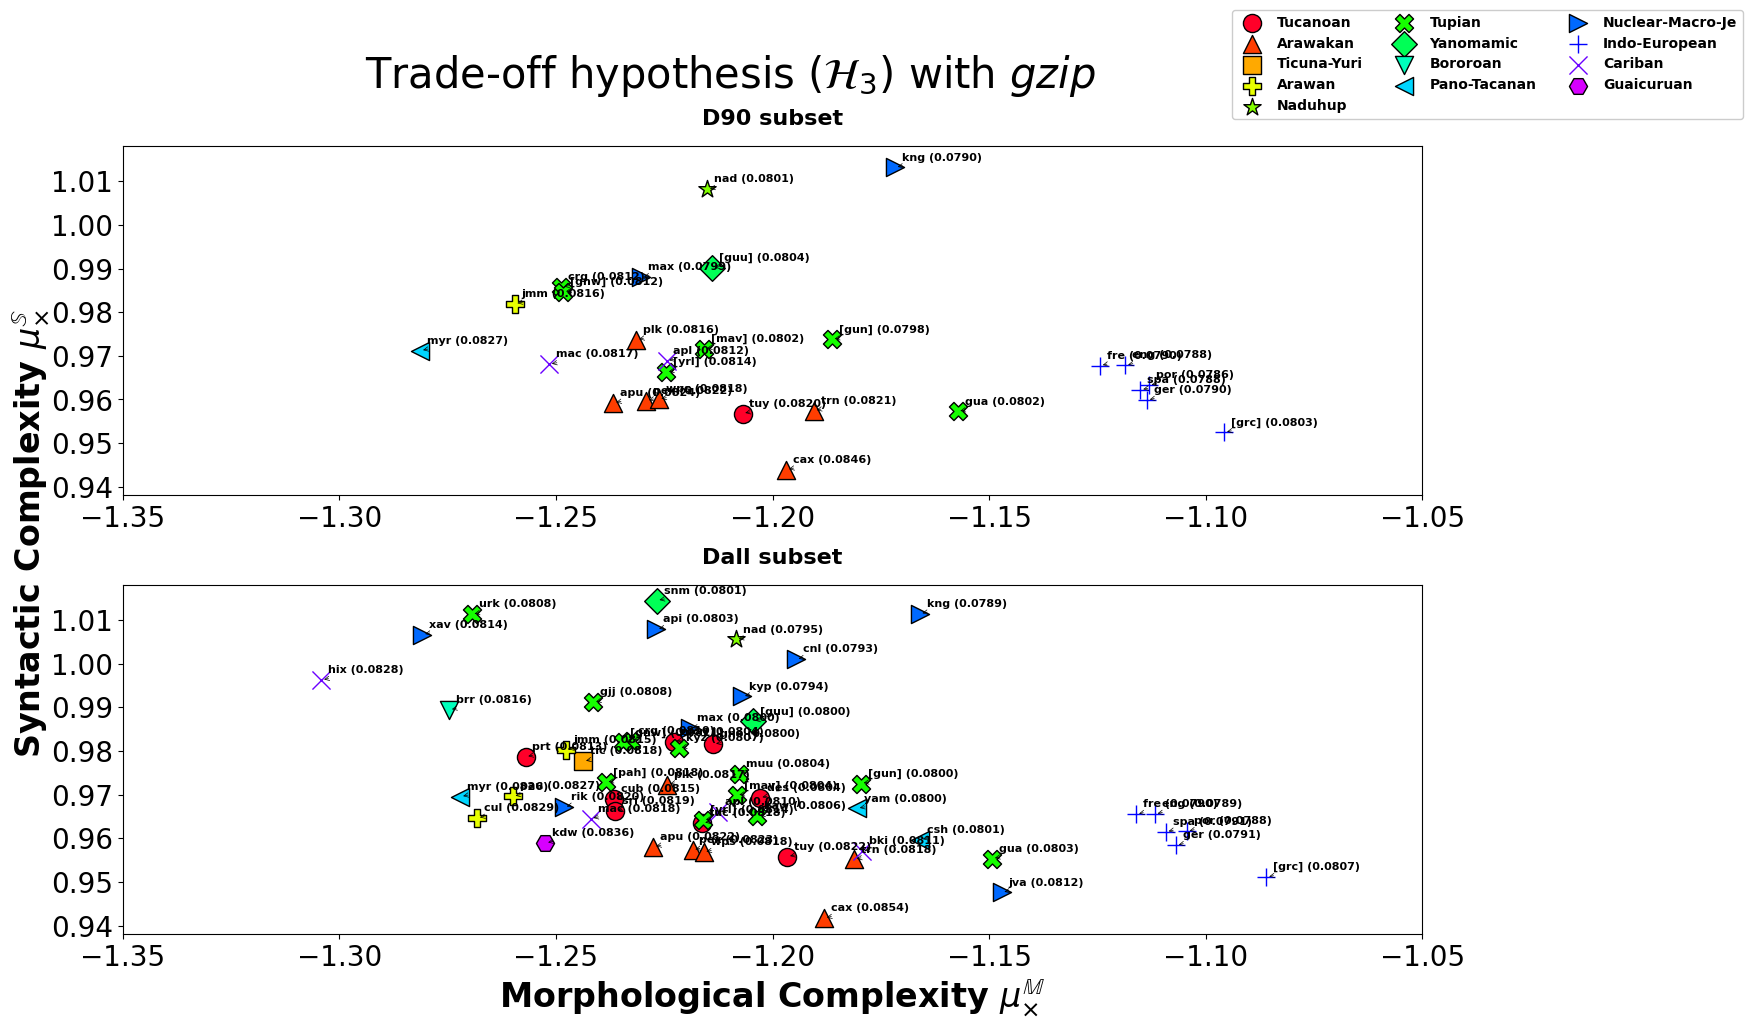

In [95]:
sem_stats_90, df90 = analyze(d90_file)
sem_stats_all, dfall = analyze(dall_file)
family = pd.read_csv(family_file, index_col=None)

def plot(df90, dfall, sem_stats_90, sem_stats_all, algo, family, wals=None):
    def process_df(df, algo, wals):
        wals = wals or set(df.wals)
        df = compute(df[df.wals.isin(wals)], algo)
        df = df.merge(family[['wals', 'family_glottocode']], on='wals', how='left')
        return df

    def create_color_marker_dicts(df1, df2, families):
        unique_families = list(set(families.unique()))
        colors = plt.cm.gist_rainbow(np.linspace(0.0, 1, len(unique_families)))
        markers = ['o', '^', 's', 'P', '*', 'X', 'D', 'v', '<', '>', '+', 'x', 'H', '1', '2', '3', '4', '8', '|', '_']
        family_to_color = {f: colors[i] for i, f in enumerate(unique_families)}
        family_to_marker = {f: markers[i] for i, f in enumerate(unique_families)}
        return unique_families, (colors, family_to_color), (markers, family_to_marker)

    def set_color_marker(df, family_to_color, family_to_marker): 
        df['color'] = df['family_glottocode'].map(family_to_color)
        df['marker'] = df['family_glottocode'].map(family_to_marker)
        return df

    df90 = process_df(df90, algo, wals)
    dfall = process_df(dfall, algo, wals)

    # Merge SEM data
    df90 = df90.merge(sem_stats_90, on='language', how='left')
    dfall = dfall.merge(sem_stats_all, on='language', how='left')

    unique_families, (colors, f2c), (markers, f2m) = create_color_marker_dicts(df90, dfall, dfall['family_glottocode'])

    df90 = set_color_marker(df90, f2c, f2m)
    dfall = set_color_marker(dfall, f2c, f2m)
    
    fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=False, sharey=True)
    fig.suptitle(r"Trade-off hypothesis ($\mathcal{H}_3$) with $\it{%s}$" % (algo.lower(),), fontsize=30)
    fig.supylabel(r'Syntactic Complexity $\mu^{\mathbb{S}}_{\times}$', weight='bold', fontsize=24)
    titles = ['D90 subset', 'Dall subset']

    for di, df in enumerate([df90, dfall]):
        x = df['del-chars'].to_numpy()
        y = df['del-words'].to_numpy()
        l = df['wals'].to_numpy()
        sem = df['sem'].to_numpy()
        
        ax[di].set_xlim((-1.35, -1.05))
        for i, f in enumerate(unique_families):
            df_family = df[df['family_glottocode'] == f]
            if len(df_family):
                ax[di].scatter(
                    df_family['del-chars'],
                    df_family['del-words'],
                    c=[colors[i]],
                    marker=markers[i],
                    edgecolor='black',
                    linewidth=1,
                    label=f if di == 1 else "",
                    s=170,
                )
        
        for xi, yi, li, sem_val in zip(x, y, l, sem):
            ax[di].annotate(
                f'{li} ({sem_val:.4f})',
                xy=(xi, yi),
                xytext=(5, 5),  # Offset para evitar sobreposição
                textcoords='offset points',
                fontsize=8,
                weight='bold',
                arrowprops=dict(arrowstyle='->', lw=0.5)
            )
        
        if di == 1: ax[di].set_xlabel(r'Morphological Complexity $\mu^{\mathbb{M}}_{\times}$', weight='bold', fontsize=24)
        ax[di].set_title(titles[di], fontsize=16, weight='bold', pad=15)
        
        ax[di].set_xticklabels(ax[di].get_xticklabels(), fontsize=20)
        ax[di].set_yticklabels(ax[di].get_yticklabels(), fontsize=20)

    legend = fig.legend(fontsize=12, bbox_to_anchor=(0.4, 0.3, 0.78, 0.730), ncol=3, prop={'weight' : 'bold'})
    legend.get_frame().set_alpha(None)
    legend.get_title().set_fontsize('x-large')
    fig.tight_layout()
    fig.savefig("../images/h3_with_sem.pdf")

# Chamada da função plot
plot(df90, dfall, sem_stats_90, sem_stats_all, 'gzip', family=family)